In [6]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False

class DogsVSCats():
    
    IMG_SIZE = 50
    CATS = "kagglecatsanddogs/PetImages/Cat"
    DOGS = "kagglecatsanddogs/PetImages/Dog"
    LABELS = {CATS : 0, DOGS : 1}
    
    training_data = []
    catcount = 0
    dogcount = 1
    
    def make_training_data(self):
        
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label, f)
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])

                    if label == self.CATS:
                        self.catcount += 1
                    elif label == self.DOGS:
                        self.dogcount += 1
                except Exception as e:
                    pass
                    #print(str(e))
        
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Cats : {}".format(self.catcount))
        print("Dogs : {}".format(self.dogcount))
        
if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

In [9]:
training_data = np.load("training_data.npy", allow_pickle = True)
print(len(training_data))

24946


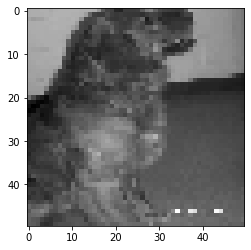

array([0., 1.])

In [17]:
import matplotlib.pyplot as plt

plt.imshow(training_data[2][0], cmap = 'gray')
plt.show()
training_data[2][1]